In [66]:
import numpy as np

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X * X + np.random.randn(m, 1)

In [67]:
X[:10]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547]])

In [68]:
y[:10]

array([[1.61761105],
       [8.06185944],
       [4.45250583],
       [0.77958493],
       [1.84625712],
       [2.42319555],
       [4.34161741],
       [6.09231611],
       [1.98223289],
       [3.52597398]])

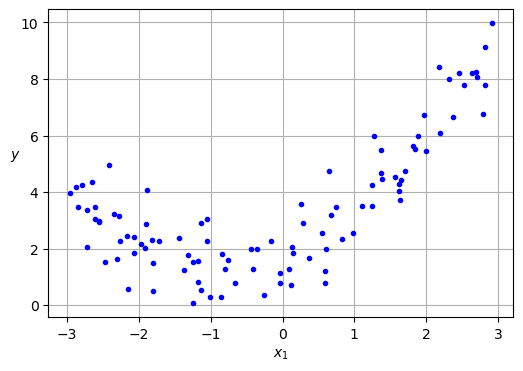

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.show()

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433],
       [-2.06403288,  4.26023172],
       [-2.65149833,  7.03044338],
       [ 2.19705687,  4.82705891],
       [ 0.60669007,  0.36807284],
       [ 1.24843547,  1.55859111]])

In [71]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

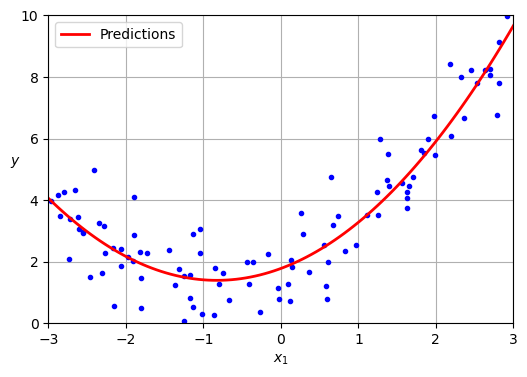

In [72]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [73]:
y_pred = lin_reg.predict(poly_features.transform([[3]]))
y_pred

array([[9.66341631]])

In [74]:
poly_features.transform([[3]])

array([[3., 9.]])